In [67]:
#importing libraries to be used
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

In [68]:
from sklearn.preprocessing import MinMaxScaler 
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM, Bidirectional

In [69]:
#importing data csv file
df = pd.read_csv("NFLX.csv")
df.head(10)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-02-05,262.000000,267.899994,250.029999,254.259995,254.259995,11896100
1,2018-02-06,247.699997,266.700012,245.000000,265.720001,265.720001,12595800
2,2018-02-07,266.579987,272.450012,264.329987,264.559998,264.559998,8981500
3,2018-02-08,267.079987,267.619995,250.000000,250.100006,250.100006,9306700
4,2018-02-09,253.850006,255.800003,236.110001,249.470001,249.470001,16906900
5,2018-02-12,252.139999,259.149994,249.000000,257.950012,257.950012,8534900
6,2018-02-13,257.290009,261.410004,254.699997,258.269989,258.269989,6855200
7,2018-02-14,260.470001,269.880005,260.329987,266.000000,266.000000,10972000
8,2018-02-15,270.029999,280.500000,267.630005,280.269989,280.269989,10759700
9,2018-02-16,278.730011,281.959991,275.690002,278.519989,278.519989,8312400


In [70]:
df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
1004,2022-01-31,401.970001,427.700012,398.200012,427.140015,427.140015,20047500
1005,2022-02-01,432.959991,458.480011,425.540009,457.130005,457.130005,22542300
1006,2022-02-02,448.250000,451.980011,426.480011,429.480011,429.480011,14346000
1007,2022-02-03,421.440002,429.260010,404.279999,405.600006,405.600006,9905200
1008,2022-02-04,407.309998,412.769989,396.640015,410.170013,410.170013,7782400


In [71]:
df.shape

(1009, 7)

In [72]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1009.000000,1009.000000,1009.000000,1009.000000,1009.000000,1.009000e+03
mean,419.059673,425.320703,412.374044,419.000733,419.000733,7.570685e+06
std,108.537532,109.262960,107.555867,108.289999,108.289999,5.465535e+06
min,233.919998,250.649994,231.229996,233.880005,233.880005,1.144000e+06
25%,331.489990,336.299988,326.000000,331.619995,331.619995,4.091900e+06
50%,377.769989,383.010010,370.880005,378.670013,378.670013,5.934500e+06
75%,509.130005,515.630005,502.529999,509.079987,509.079987,9.322400e+06
max,692.349976,700.989990,686.090027,691.690002,691.690002,5.890430e+07


In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1009 entries, 0 to 1008
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1009 non-null   object 
 1   Open       1009 non-null   float64
 2   High       1009 non-null   float64
 3   Low        1009 non-null   float64
 4   Close      1009 non-null   float64
 5   Adj Close  1009 non-null   float64
 6   Volume     1009 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 55.3+ KB


In [74]:
df.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [75]:
df.set_index('Date',drop=True,inplace=True) 
df.head(10)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-02-05,262.000000,267.899994,250.029999,254.259995,254.259995,11896100
2018-02-06,247.699997,266.700012,245.000000,265.720001,265.720001,12595800
2018-02-07,266.579987,272.450012,264.329987,264.559998,264.559998,8981500
2018-02-08,267.079987,267.619995,250.000000,250.100006,250.100006,9306700
2018-02-09,253.850006,255.800003,236.110001,249.470001,249.470001,16906900
2018-02-12,252.139999,259.149994,249.000000,257.950012,257.950012,8534900
2018-02-13,257.290009,261.410004,254.699997,258.269989,258.269989,6855200
2018-02-14,260.470001,269.880005,260.329987,266.000000,266.000000,10972000
2018-02-15,270.029999,280.500000,267.630005,280.269989,280.269989,10759700


array([[<Axes: title={'center': 'Open'}>,
        <Axes: title={'center': 'High'}>],
       [<Axes: title={'center': 'Low'}>,
        <Axes: title={'center': 'Close'}>],
       [<Axes: title={'center': 'Adj Close'}>,
        <Axes: title={'center': 'Volume'}>]], dtype=object)

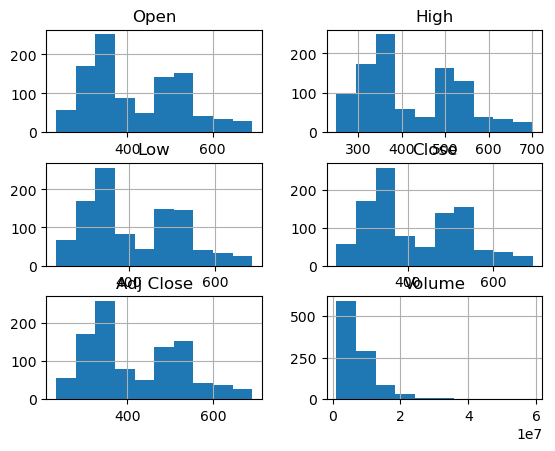

In [76]:
df.hist()

C:\Users\shah7\AppData\Local\Temp\ipykernel_8676\1924468963.py:13: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


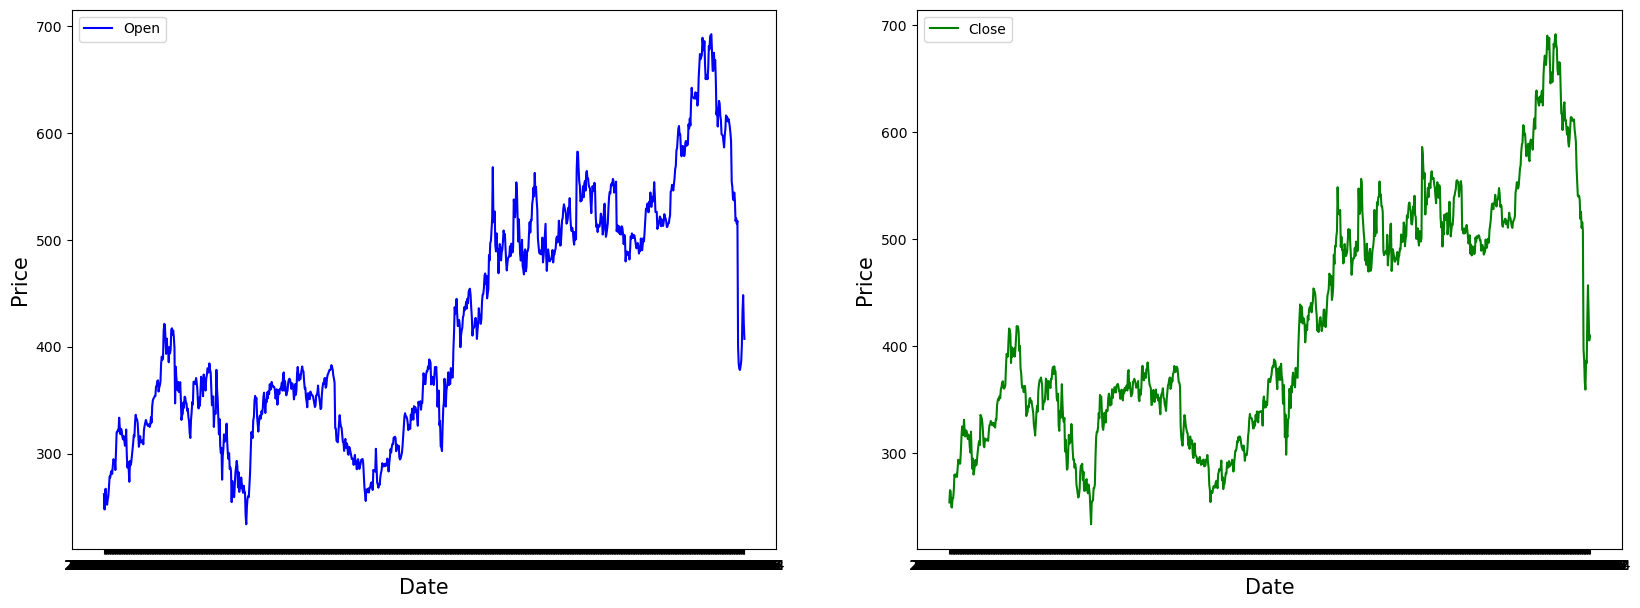

In [77]:
# plotting open and closing price on date index
fig, ax =plt.subplots(1,2,figsize=(20,7))
ax[0].plot(df['Open'],label='Open',color='blue')
ax[0].set_xlabel('Date',size=15)
ax[0].set_ylabel('Price',size=15)
ax[0].legend()

ax[1].plot(df['Close'],label='Close',color='green')
ax[1].set_xlabel('Date',size=15)
ax[1].set_ylabel('Price',size=15)
ax[1].legend()

fig.show()

In [125]:
MMS = MinMaxScaler()
df[df.columns] = MMS.fit_transform(df)
df.head(10)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-02-05,0.061253,0.038304,0.041331,0.044516,0.044516,0.186150
2018-02-06,0.030059,0.035640,0.030273,0.069548,0.069548,0.198264
2018-02-07,0.071243,0.048408,0.072770,0.067015,0.067015,0.135690
2018-02-08,0.072334,0.037683,0.041265,0.035430,0.035430,0.141320
2018-02-09,0.043474,0.011436,0.010729,0.034053,0.034053,0.272902
2018-02-12,0.039744,0.018875,0.039067,0.052576,0.052576,0.127958
2018-02-13,0.050978,0.023893,0.051598,0.053275,0.053275,0.098878
2018-02-14,0.057915,0.042701,0.063976,0.070160,0.070160,0.170151
2018-02-15,0.078769,0.066283,0.080025,0.101330,0.101330,0.166476


In [79]:
df.tail(10)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-01-24,0.327182,0.303349,0.264323,0.334790,0.334790,0.540198
2022-01-25,0.316777,0.304348,0.294376,0.289509,0.289509,0.242412
2022-01-26,0.314879,0.293134,0.275667,0.274830,0.274830,0.199791
2022-01-27,0.323146,0.320091,0.322891,0.333807,0.333807,0.401326
2022-01-28,0.333399,0.302771,0.309656,0.328695,0.328695,0.187371
2022-01-31,0.366577,0.393147,0.367080,0.422140,0.422140,0.327275
2022-02-01,0.434178,0.461496,0.427186,0.487648,0.487648,0.370467
2022-02-02,0.467531,0.447062,0.429253,0.427251,0.427251,0.228565
2022-02-03,0.409048,0.396611,0.380447,0.375090,0.375090,0.151682


In [80]:
# Select 75 % for train and 25 % for test
training_size = round(len(df) * 0.75) 

In [81]:
training_size


757

In [82]:
train_data = df[:training_size]
test_data  = df[training_size:]

train_data.shape, test_data.shape

((757, 6), (252, 6))

In [83]:
# Function to create sequence of data for training and testing

def create_sequence(dataset):
  sequences = []
  labels = []

  start_idx = 0

  for stop_idx in range(50,len(dataset)): # Selecting 50 rows at a time
    sequences.append(dataset.iloc[start_idx:stop_idx])
    labels.append(dataset.iloc[stop_idx])
    start_idx += 1
  return (np.array(sequences),np.array(labels))

In [84]:
train_seq, train_label = create_sequence(train_data) 
test_seq, test_label = create_sequence(test_data)
train_seq.shape, train_label.shape, test_seq.shape, test_label.shape

((707, 50, 6), (707, 6), (202, 50, 6), (202, 6))

# # Creating LSTM Model(Long  Short term Memory)

In [87]:
# imported Sequential from keras.models 
model = Sequential()
# importing Dense, Dropout, LSTM, Bidirectional from keras.layers 
model.add(LSTM(units=25, return_sequences=True, input_shape = (train_seq.shape[1], train_seq.shape[2])))

model.add(Dropout(0.1)) 
model.add(LSTM(units=25))

model.add(Dense(6, activation='linear'))

model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_absolute_error'])

model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_8 (LSTM)               (None, 50, 25)            3200      
                                                                 
 dropout_4 (Dropout)         (None, 50, 25)            0         
                                                                 
 lstm_9 (LSTM)               (None, 25)                5100      
                                                                 
 dense_4 (Dense)             (None, 6)                 156       
                                                                 
Total params: 8456 (33.03 KB)
Trainable params: 8456 (33.03 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [88]:
# fitting the model by iterating the dataset over 100 times(100 epochs)
model.fit(train_seq, train_label, epochs=100,validation_data=(test_seq, test_label), verbose=1)


Epoch 1/100
23/23 [==============================] - 15s 198ms/step - loss: 0.0257 - mean_absolute_error: 0.1187 - val_loss: 0.0443 - val_mean_absolute_error: 0.1802
Epoch 2/100
23/23 [==============================] - 2s 94ms/step - loss: 0.0054 - mean_absolute_error: 0.0531 - val_loss: 0.0154 - val_mean_absolute_error: 0.0882
Epoch 3/100
23/23 [==============================] - 2s 96ms/step - loss: 0.0034 - mean_absolute_error: 0.0414 - val_loss: 0.0119 - val_mean_absolute_error: 0.0767
Epoch 4/100
23/23 [==============================] - 2s 95ms/step - loss: 0.0032 - mean_absolute_error: 0.0403 - val_loss: 0.0107 - val_mean_absolute_error: 0.0724
Epoch 5/100
23/23 [==============================] - 2s 93ms/step - loss: 0.0030 - mean_absolute_error: 0.0382 - val_loss: 0.0112 - val_mean_absolute_error: 0.0757
Epoch 6/100
23/23 [==============================] - 2s 95ms/step - loss: 0.0030 - mean_absolute_error: 0.0385 - val_loss: 0.0121 - val_mean_absolute_error: 0.0810
Epoch 7/100
23

Epoch 51/100
23/23 [==============================] - 2s 85ms/step - loss: 0.0018 - mean_absolute_error: 0.0283 - val_loss: 0.0043 - val_mean_absolute_error: 0.0421
Epoch 52/100
23/23 [==============================] - 2s 89ms/step - loss: 0.0019 - mean_absolute_error: 0.0289 - val_loss: 0.0040 - val_mean_absolute_error: 0.0400
Epoch 53/100
23/23 [==============================] - 2s 95ms/step - loss: 0.0018 - mean_absolute_error: 0.0279 - val_loss: 0.0055 - val_mean_absolute_error: 0.0516
Epoch 54/100
23/23 [==============================] - 2s 89ms/step - loss: 0.0018 - mean_absolute_error: 0.0289 - val_loss: 0.0038 - val_mean_absolute_error: 0.0392
Epoch 55/100
23/23 [==============================] - 2s 92ms/step - loss: 0.0018 - mean_absolute_error: 0.0285 - val_loss: 0.0040 - val_mean_absolute_error: 0.0398
Epoch 56/100
23/23 [==============================] - 2s 95ms/step - loss: 0.0017 - mean_absolute_error: 0.0276 - val_loss: 0.0039 - val_mean_absolute_error: 0.0395
Epoch 57/1

23/23 [==============================] - 2s 96ms/step - loss: 0.0014 - mean_absolute_error: 0.0236 - val_loss: 0.0036 - val_mean_absolute_error: 0.0391


In [89]:
# predicting the values after running the model
test_predicted = model.predict(test_seq)
test_predicted[:4]

7/7 [==============================] - 2s 25ms/step


array([[0.68723863, 0.68060595, 0.68077916, 0.6842564 , 0.68371093,
        0.13228832],
       [0.62908596, 0.62472993, 0.6065805 , 0.6217336 , 0.61443436,
        0.2566458 ],
       [0.6042263 , 0.58936703, 0.59230167, 0.5865391 , 0.5913499 ,
        0.13485523],
       [0.59509146, 0.57810616, 0.5820982 , 0.58338547, 0.5841743 ,
        0.10849462]], dtype=float32)

In [123]:
# Inversing normalization/scaling on predicted data 
test_inverse_predicted = MMS.inverse_transform(test_predicted)
test_inverse_predicted[:5]

array([[5.4897076e+02, 5.5715405e+02, 5.4088922e+02, 5.4713940e+02,
        5.4688971e+02, 8.7850140e+06],
       [5.2231183e+02, 5.3199084e+02, 5.0713922e+02, 5.1851587e+02,
        5.1517419e+02, 1.5967939e+07],
       [5.1091544e+02, 5.1606555e+02, 5.0064432e+02, 5.0240344e+02,
        5.0460590e+02, 8.9332790e+06],
       [5.0672778e+02, 5.1099432e+02, 4.9600317e+02, 5.0095972e+02,
        5.0132083e+02, 7.4106815e+06],
       [5.1057327e+02, 5.1497919e+02, 5.0124875e+02, 5.0681580e+02,
        5.0812872e+02, 5.1443095e+06]], dtype=float32)

In [129]:


# Create example data (replace with your actual data)
train_data = np.random.rand(100, 6)  # Training data with 6 features
test_data = np.random.rand(10, 6)    # Test data with 6 features
test_predicted = np.random.rand(10, 6)  # Replace with your predicted data

# Fit the scaler on training data
MMS = MinMaxScaler().fit(train_data)

# Check if shapes match
print(train_data.shape)
print(test_data.shape)
print(test_predicted.shape)

# Attempt to inverse transform
test_inverse_predicted = MMS.inverse_transform(test_predicted)
print(test_inverse_predicted[:5])


(100, 6)
(10, 6)
(10, 6)
[[0.49950345 0.90500337 0.56449194 0.09291669 0.30635288 0.01831343]
 [0.7918291  0.82313489 0.6537234  0.54543825 0.21979573 0.17115762]
 [0.23092791 0.48593216 0.6005396  0.54419192 0.79736183 0.0236891 ]
 [0.54309527 0.08260603 0.01335027 0.10198467 0.44174548 0.35922957]
 [0.10413392 0.09273658 0.82058331 0.77171656 0.60130775 0.70660685]]


In [140]:
# Create DataFrames from the inverse transformed data
df_train_inverse = pd.DataFrame(train_data_inverse, columns=['column1', 'column2', 'column3', 'column4', 'column5', 'column6'])
df_test_inverse = pd.DataFrame(test_data_inverse, columns=['column1', 'column2', 'column3', 'column4', 'column5', 'column6'])

# Print the first few rows
print(df_train_inverse.head())
print(df_test_inverse.head())


    column1   column2   column3   column4   column5   column6
0  0.520435  0.999592  0.685667  0.394241  0.107591  0.497388
1  0.973196  0.621640  0.763174  0.101383  0.773427  0.513283
2  0.599275  0.464571  0.695156  0.023526  0.407636  0.845093
3  0.725038  0.941112  0.031867  0.315883  0.909145  0.095799
4  0.743864  0.864402  0.019940  0.144878  0.346775  0.052756
    column1   column2   column3   column4   column5   column6
0  0.724371  0.122587  0.488875  0.072494  0.160975  0.674460
1  0.106699  0.985428  0.496833  0.068001  0.506324  0.069490
2  0.081766  0.081449  0.258610  0.076707  0.893977  0.809758
3  0.863755  0.305561  0.481901  0.099025  0.423733  0.899455
4  0.620233  0.316614  0.265267  0.374630  0.596404  0.407515


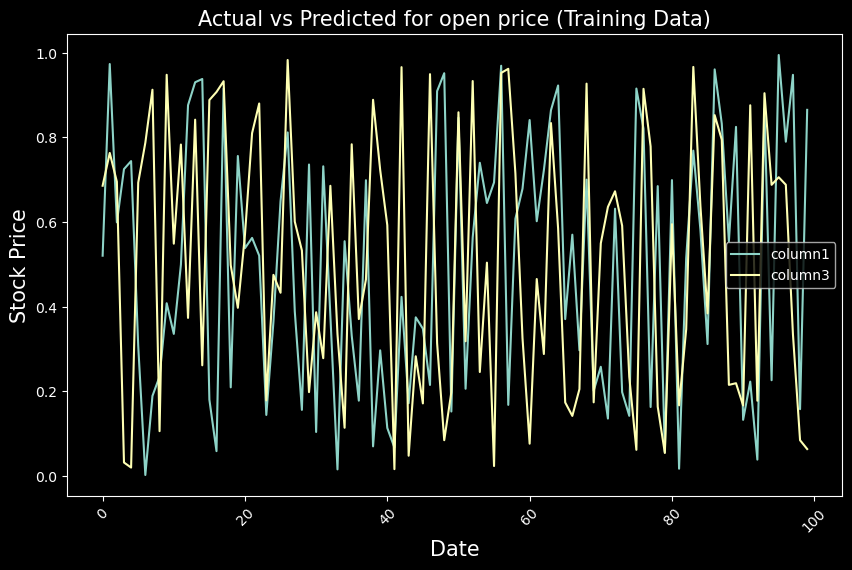

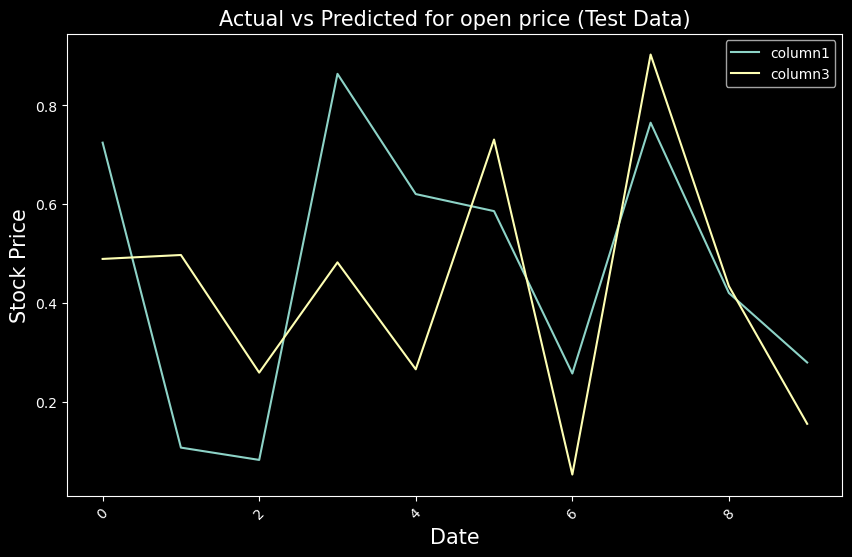

In [142]:
# Plotting the actual and predicted open prices for training data
df_train_inverse[['column1', 'column3']].plot(figsize=(10, 6))
plt.xticks(rotation=45)
plt.xlabel('Date', size=15)
plt.ylabel('Stock Price', size=15)
plt.title('Actual vs Predicted for open price (Training Data)', size=15)
plt.show()

# Plotting the actual and predicted open prices for test data
df_test_inverse[['column1', 'column3']].plot(figsize=(10, 6))
plt.xticks(rotation=45)
plt.xlabel('Date', size=15)
plt.ylabel('Stock Price', size=15)
plt.title('Actual vs Predicted for open price (Test Data)', size=15)
plt.show()

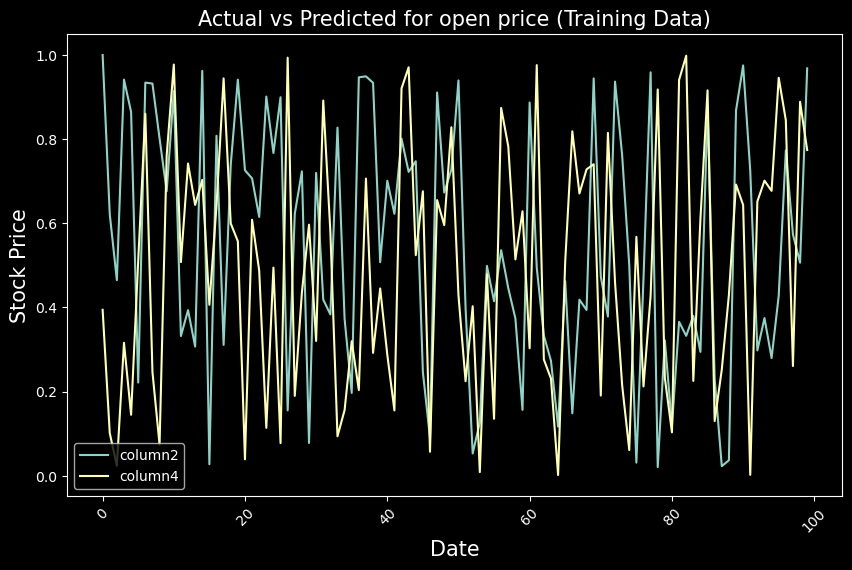

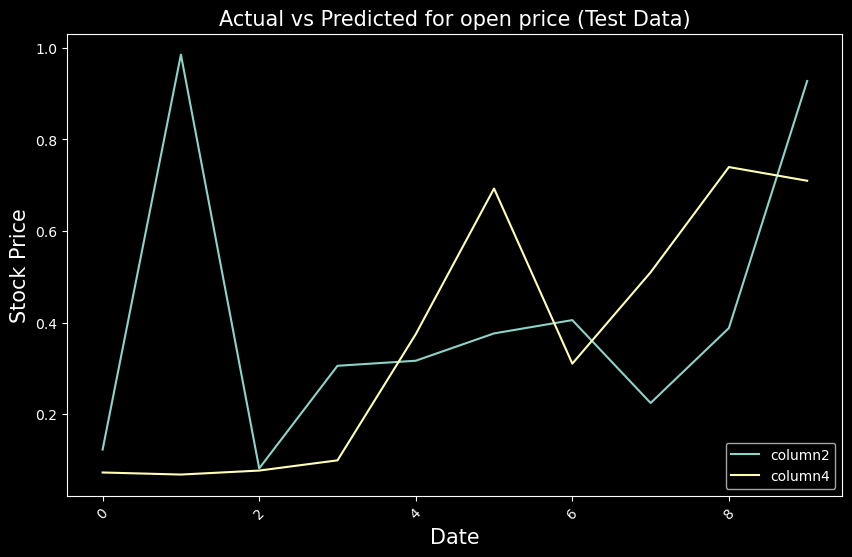

In [143]:
# Plotting the actual and predicted open prices for training data
df_train_inverse[['column2', 'column4']].plot(figsize=(10, 6))
plt.xticks(rotation=45)
plt.xlabel('Date', size=15)
plt.ylabel('Stock Price', size=15)
plt.title('Actual vs Predicted for open price (Training Data)', size=15)
plt.show()

# Plotting the actual and predicted open prices for test data
df_test_inverse[['column2', 'column4']].plot(figsize=(10, 6))
plt.xticks(rotation=45)
plt.xlabel('Date', size=15)
plt.ylabel('Stock Price', size=15)
plt.title('Actual vs Predicted for open price (Test Data)', size=15)
plt.show()

In [144]:
df_train_inverse

,column1,column2,column3,column4,column5,column6
0,0.520435,0.999592,0.685667,0.394241,0.107591,0.497388
1,0.973196,0.621640,0.763174,0.101383,0.773427,0.513283
2,0.599275,0.464571,0.695156,0.023526,0.407636,0.845093
3,0.725038,0.941112,0.031867,0.315883,0.909145,0.095799
4,0.743864,0.864402,0.019940,0.144878,0.346775,0.052756
...,...,...,...,...,...,...
95,0.994516,0.427409,0.705783,0.945534,0.199117,0.369381
96,0.789696,0.772844,0.688016,0.844766,0.624962,0.953792
97,0.947667,0.573294,0.334870,0.260600,0.982180,0.104040
98,0.157887,0.506225,0.084492,0.888439,0.487937,0.954758


In [145]:
df_test_inverse

,column1,column2,column3,column4,column5,column6
0,0.724371,0.122587,0.488875,0.072494,0.160975,0.674460
1,0.106699,0.985428,0.496833,0.068001,0.506324,0.069490
2,0.081766,0.081449,0.258610,0.076707,0.893977,0.809758
3,0.863755,0.305561,0.481901,0.099025,0.423733,0.899455
4,0.620233,0.316614,0.265267,0.374630,0.596404,0.407515
5,0.585698,0.376291,0.730664,0.692776,0.435437,0.973120
6,0.256769,0.405341,0.052130,0.310256,0.400505,0.322074
7,0.764823,0.224311,0.902839,0.509764,0.463907,0.619035
8,0.419862,0.388017,0.433712,0.739648,0.937699,0.690878
9,0.279099,0.927623,0.154881,0.709777,0.698566,0.086318


In [171]:
# creating a DataFrame and filling values of open and close column
forthcoming_prediction = pd.DataFrame(columns=['train_data','test_data'],index=df1.index)
forthcoming_prediction.index=pd.to_datetime(forthcoming_prediction.index)

In [170]:
# Adding 10 days to the existing index of df_test_inverse
last_date_test = df_test_inverse.index[-1]
new_index_test = pd.date_range(start=last_date_test, periods=11, freq='D')
df_test_extension = pd.DataFrame(columns=df_test_inverse.columns, index=new_index_test)
df_test_inverse = pd.concat([df_test_inverse, df_test_extension])

# Adding 10 days to the existing index of df_train_inverse
last_date_train = df_train_inverse.index[-1]
new_index_train = pd.date_range(start=last_date_train, periods=11, freq='D')
df_train_extension = pd.DataFrame(columns=df_train_inverse.columns, index=new_index_train)
df_train_inverse = pd.concat([df_train_inverse, df_train_extension])


In [173]:
# Inversing normalization/scaling on actual training and test data
train_data_inverse = MMS.inverse_transform(df_train_inverse)
test_data_inverse = MMS.inverse_transform(df_test_inverse)

# Create DataFrames from the inverse transformed data
df_train_inverse = pd.DataFrame(train_data_inverse, columns=df_train_inverse.columns)
df_test_inverse = pd.DataFrame(test_data_inverse, columns=df_test_inverse.columns)
